<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset</font></h1> 


# Table of Contents
In this lab, you will test sigmoid, tanh, and relu activation functions on the MNIST dataset. 

<div class="alert alert-block alert-info" style="margin-top: 20px">

<li><a href="#ref1">Neural Network Module and Training Function</a></li>
<li><a href="#ref2">Prepare Data</a></li>
<li><a href="#ref3">Define Several Neural Network, Criterion Function, and Optimizer</a></li>
<li><a href="#ref4">Test Sigmoid, Tanh, and Relu</a></li>
<li><a href="#ref4">Analyze Results</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
!conda install -y torchvision
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    torchvision-0.2.1          |           py36_0          75 KB
    certifi-2018.11.29         |           py36_0         146 KB
    openssl-1.0.2p             |       h14c3975_0         3.5 MB
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following packages will be UPDATED:

    torchvision:     0.2.1-py36_0          anaconda    --> 0.2.1-py36_0     

The following packages will be DOWNGRADED:

    ca-certificates: 2018.11.29-ha4d7672_0 conda-forge --> 2018.03.07-0     
    certifi:         2018.11.29-py36_1000  conda-forge --> 2018.11.29-py36_0
    openssl:         1.0.2p-h470a237_1     conda-forge --> 1.0.2p-h14c39

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

Define the neural network module or class: 

In [2]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
       
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

Define the class with the Tanh activation function:

In [3]:
class NetTanh(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(NetTanh,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
        
    def forward(self,x):
        x=torch.tanh(self.linear1(x))  
        x=self.linear2(x)
        return x

Define the class for the Relu activation functiona: 

In [ ]:
class NetRelu(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(NetRelu,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
        
    def forward(self,x):
        x=F.relu(self.linear1(x))  
        x=self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data.

In [15]:
def train(model,criterion, train_loader,validation_loader, optimizer, epochs=100):
    i=0
    useful_stuff={'training_loss':[],'validation_accuracy':[]}  
    
    #n_epochs
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):

            #clear gradient 
            optimizer.zero_grad()
            #make a prediction logits 
            z=model(x.view(-1,28*28))
            # calculate loss 
            loss=criterion(z,y)
    
            # calculate gradients of parameters 
            loss.backward()
            # update parameters 
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct=0
        for x, y in validation_loader:
            #perform a prediction on the validation  data  
            yhat=model(x.view(-1,28*28))
            
            _,lable=torch.max(yhat,1)
            correct+=(lable==y).sum().item()
        
        if epoch%5==0:
            print('epoch = %d'%epoch)
            print('current loss = %0.3f'%loss)
            print('')
 
    
        accuracy=100*(correct/len(validation_dataset))
   
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [6]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [8]:
criterion=nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object:

In [9]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

<a id="ref3"></a>
<h2 align=center>Define the Neural Network, Criterion Function, Optimizer, and Train the Model  </h2> 

Create the criterion function: 

In [10]:
criterion=nn.CrossEntropyLoss()

Create the model with 100 hidden layers:  

In [11]:
input_dim=28*28
hidden_dim=100
output_dim=10

model=Net(input_dim,hidden_dim,output_dim)

Print the model parameters: 

<a id="ref4"></a>
<h2 align=center>Test Sigmoid, Tanh, and Relu</h2> 

Train the network by using the sigmoid activations function:

In [16]:
model=Net(input_dim,hidden_dim,output_dim)

learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.308

epoch = 5
current loss = 2.251

epoch = 10
current loss = 2.212

epoch = 15
current loss = 2.166

epoch = 20
current loss = 2.104

epoch = 25
current loss = 2.034



Train the network by using the Tanh activations function:

In [17]:
model_Tanh=NetTanh(input_dim,hidden_dim,output_dim)
optimizer=torch.optim.SGD(model_Tanh.parameters(),lr=learning_rate)
training_results_tanch=train(model_Tanh,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.210

epoch = 5
current loss = 1.692

epoch = 10
current loss = 1.252

epoch = 15
current loss = 0.973

epoch = 20
current loss = 0.810

epoch = 25
current loss = 0.707



Train the network by using the Relu activations function:

In [18]:
modelRelu=NetRelu(input_dim,hidden_dim,output_dim)
optimizer=torch.optim.SGD(modelRelu.parameters(),lr=learning_rate)
training_results_relu=train(modelRelu,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.252

epoch = 5
current loss = 1.925

epoch = 10
current loss = 1.466

epoch = 15
current loss = 1.084

epoch = 20
current loss = 0.861

epoch = 25
current loss = 0.706



<a id="ref5"></a>
<h2 align=center>Analyze Results</h2> 

Compare the training loss for each activation: 

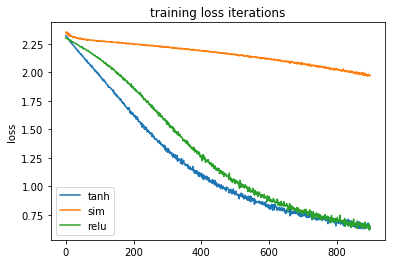

In [19]:
plt.plot(training_results_tanch['training_loss'],label='tanh')
plt.plot(training_results['training_loss'],label='sim')
plt.plot(training_results_relu['training_loss'],label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model:  

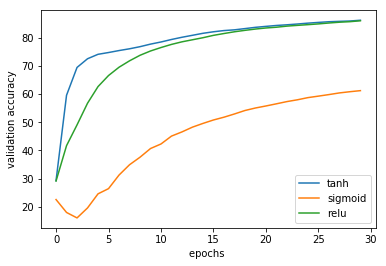

In [20]:
plt.plot(training_results_tanch['validation_accuracy'],label='tanh')
plt.plot(training_results['validation_accuracy'],label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'],label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).